# Yellowbrick Tutorial

This notebook provides a few examples of the visualizers available in the Yellowbrick library that enable a data scientist to more efficiently perform feature analysis, hyperparameter tuning, and model selection.  If you are familiar with Scikit-Learn, you will notice the similar APIs.

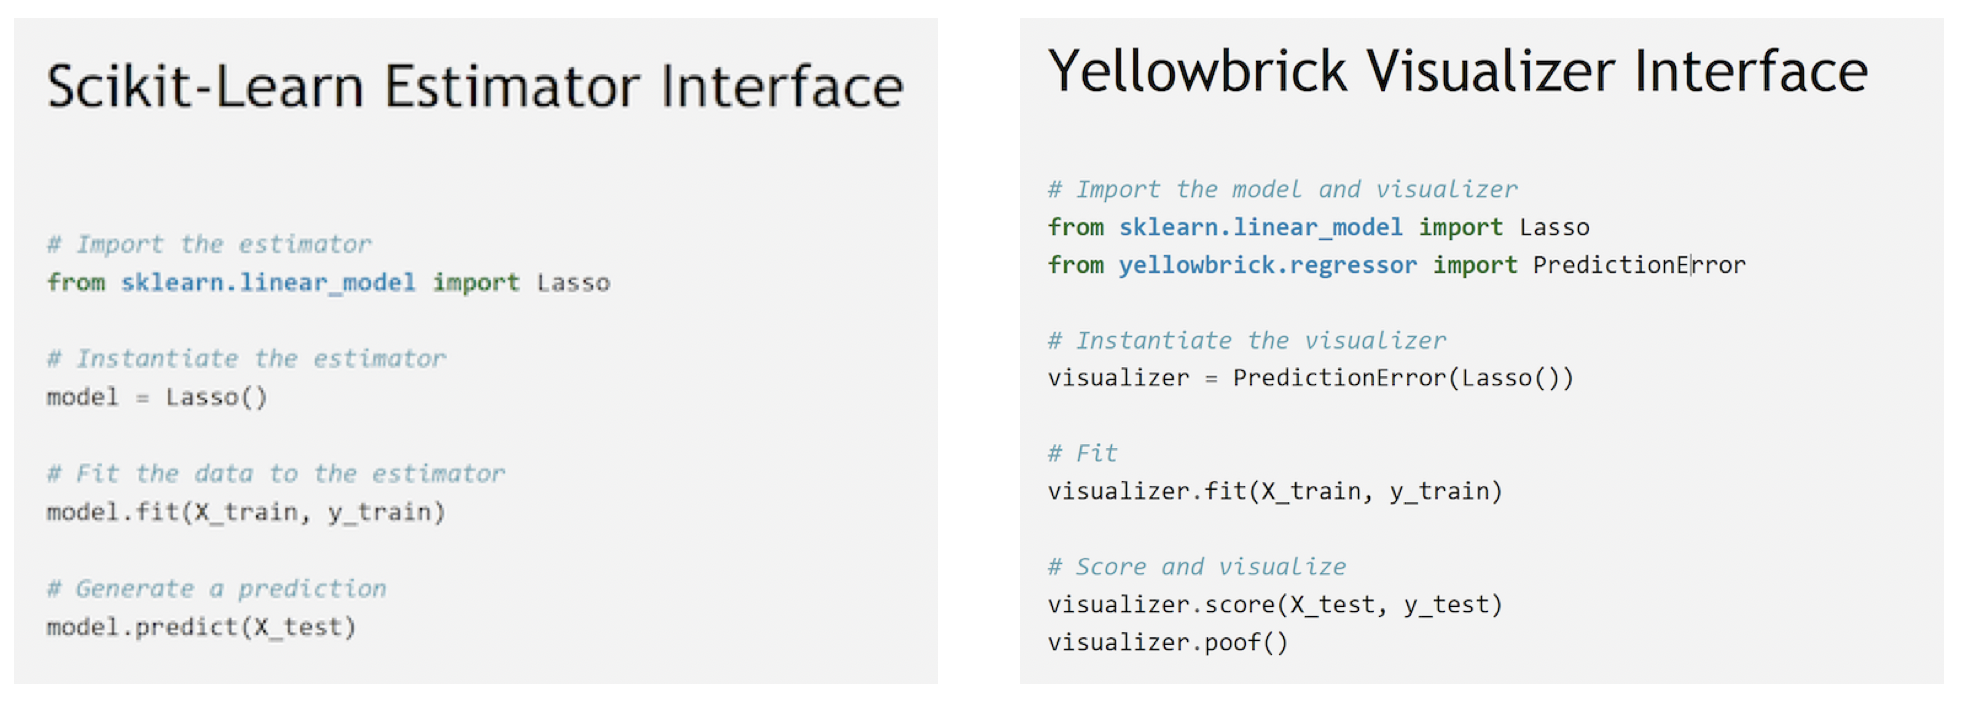

### Setting up project

In [1]:
%matplotlib inline

In [2]:
# setting up imports
import os
import sys 

# Modify the path 
sys.path.append("..")

import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (9,6)

## Section 1: Feature Analysis

Before deciding on a model, it is important to understand the features in the data and how they can impact the model selection process.  It is also particularly important in cases where there are a significant number of features to determine if there is a way to reduce the numbers without compromising the model's effectiveness.  In other words, the objective is to run the model against a smaller subset of features that will most inform the model.

### Rank Features

The `Rank2D` visualizer is a two-dimensional ranking of features that utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix.

In the following example, we use the pearson correlation algorithm, which is the covariance of two features divided by their standard deviations.  If features are highly correlated to each other, we can remove the duplicate features as they would not add value to the model.



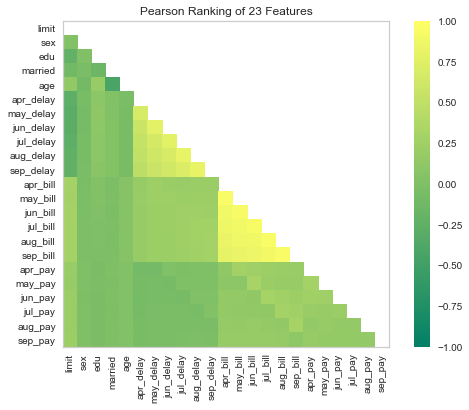

In [3]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the pearson correlation ranking algorithm
visualizer = Rank2D(algorithm='pearson', colormap='summer')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

### Feature Importance

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted. The Yellowbrick `FeatureImportances` visualizer utilizes this attribute to rank and plot relative importances.  That is, the importance of each feature is calculated as a percentage of the feature that had the highest feature importance score.

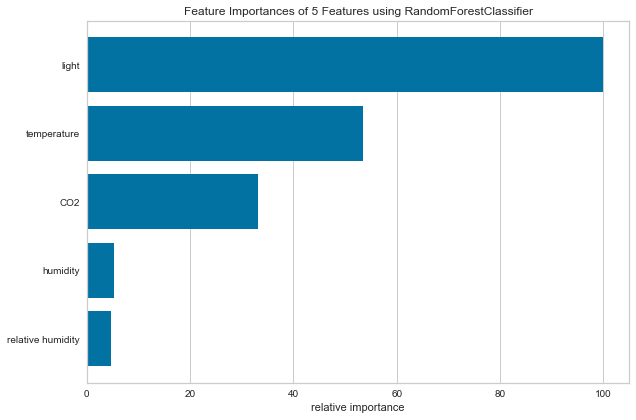

In [4]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.features import FeatureImportances

# Load the classification data set
X, y = load_occupancy()

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.poof()

## Section 2: Hyperparameter Tuning

A number of machine learning models contain hyperparameters that need to be tuned during the fitting and prediction process.  In other words, there is a trial and error that has to take place to determine the values that will produce the best model.  Yellowbrick has visualizers that allows users to quickly determine the best hyperparameters.

### Clustering model evaluation using the elbow method

Yellowbrick provides the `KElbowVisualizer` to visualize the optimal number of clusters by fitting the model with a range of values for 𝐾 in the `KMeans` algorithm.  The curve on the chart would somewhat resemble an arm and the inflection point of the curve (which looks like an elbow) would denote the optimal number of clusters.  This point is annotated in the chart with a vertical dashed line.  The visualizer also adds another curve that shows the time it takes to train the clustering model for each 𝐾.

To demonstrate, in the following example the `KElbowVisualizer` fits the `KMeans` model for a range of 𝐾 values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

By default, the scoring parameter `metric` is set to `distortion`, which computes the sum of squared distances from each point to its assigned center.

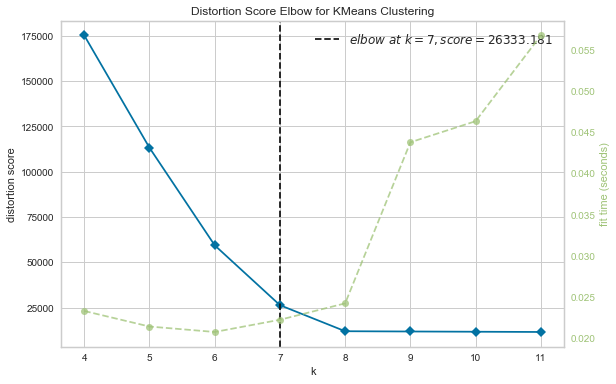

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, shuffle=True, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

## Section 3: Model Selection

Select a model family that best defines the relationship between the variables of interest.  There are several visualizers that help guide this process.  We will look at a few examples.

### Classification Report 

The classification report visualizer displays the precision, recall, and F1 scores for a model. If `support=True` is added, it also provides the number of occurences of each label.  Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection. 

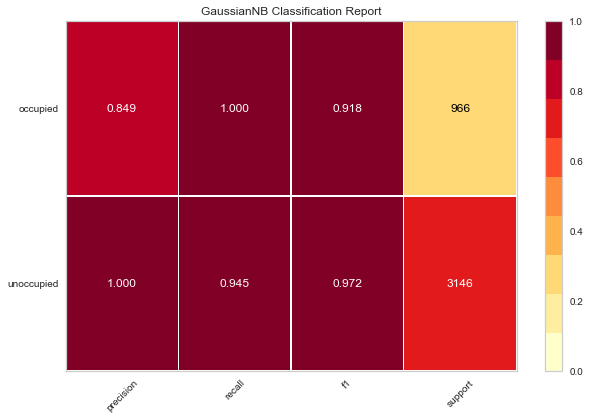

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the classes of the target
classes = ["unoccupied", "occupied"]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

### Residuals Plot

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

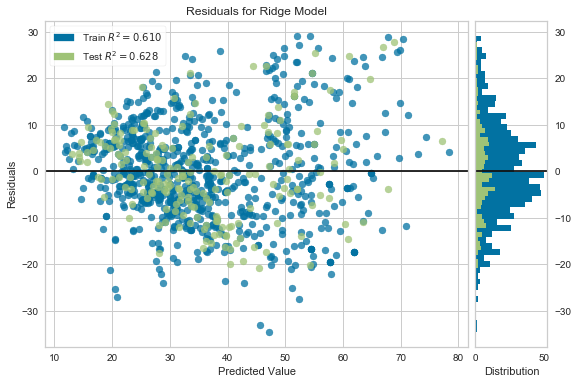

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

### Dispersion Plot

A word’s importance can be weighed by its dispersion in a corpus. Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus. This plot notes the occurrences of a word and how many words from the beginning of the corpus it appears.

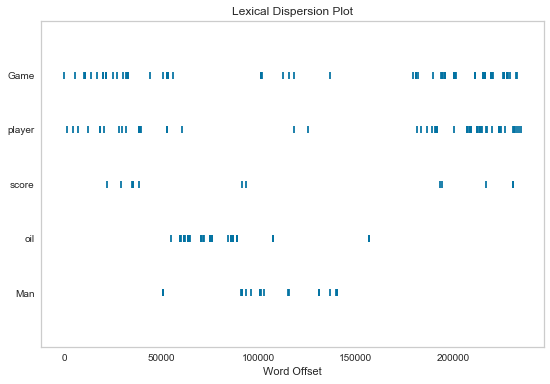

In [8]:
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.data]

# Choose words whose occurence in the text will be plotted
target_words = ['Game', 'player', 'score', 'oil', 'Man']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.poof()

A very interesting example of the dispersion plot is on the NLTK website where a synthetic text was created by combining 220 years of the U.S. Presidential Inaugural Addresses.  The visualization compared the usage of the words: **citizens, democracy, freedom, duties, America**.  Note the changes in the visualization below.

Source: https://www.nltk.org
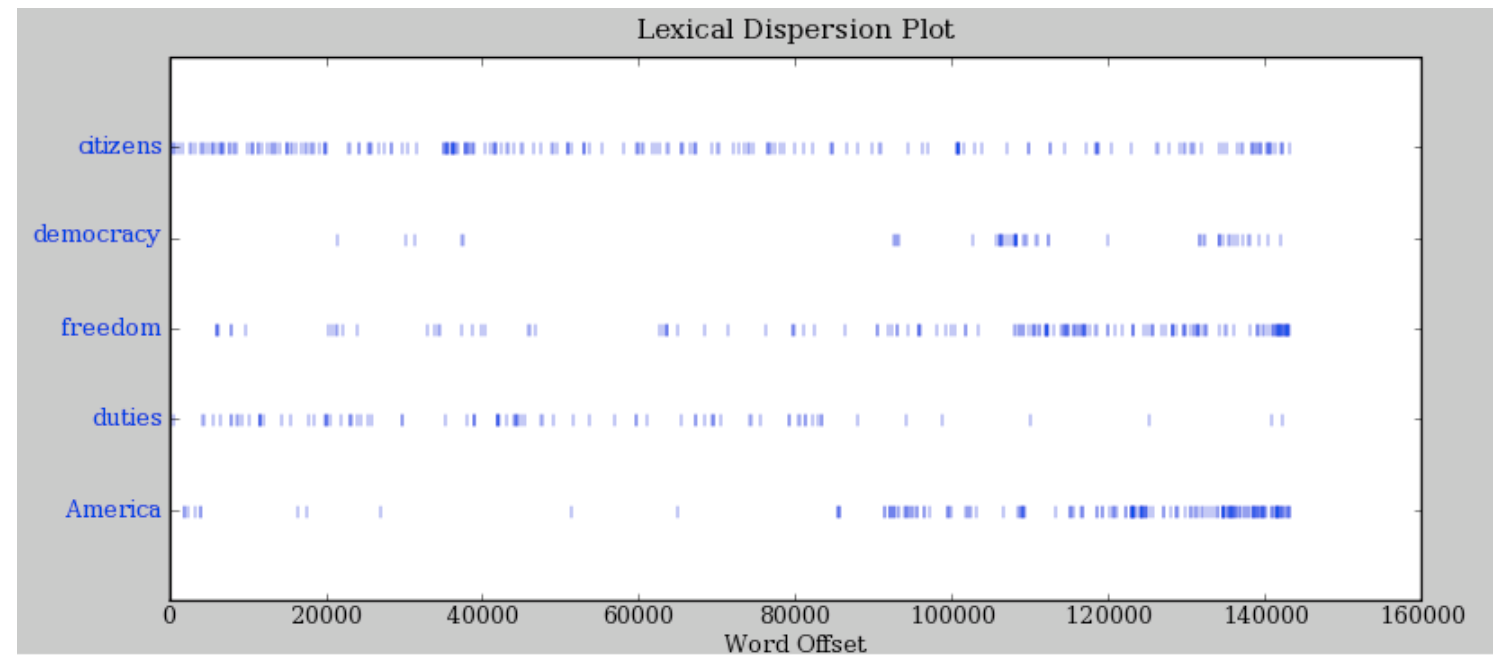